In [1]:
#group name starts with...
gname='B27001'

path=%pwd #Current path. I work in this path all throughout

# I put together all the files containing the group name in the path above, then zipped the folder.
# Now we can unzip it and work from one path only. Uncomment the next 4 lines once you have the zip archive. 
# If you already have all the files uploaded, you can ignode the next step. 



# import zipfile as zf
# files = zf.ZipFile("Insurance.zip", 'r')
# files.extractall('C:\\Users\\angel\\Documents\\NCNW Census 2018\\TrendAnalysis\\Insurance')  #input the path %pwd here
# files.close()





In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_files = os.listdir(path)  #input the path %pwd here


In [3]:
#set up labels for race/ethnicity, and years



#You may have general data files, without a race/ethnicity label A, B, C etc. Adjust accordingly if you want to work with that dataset as well


#long ethnicity labels
ethnicityLabels={'White alone':'A', "Black or African-American alone":'B', "American Indian or Alaska Native alone":'C', 
           "Asian alone":'D', 'Native Hawaiian and other Pacific Islander alone':'E', 'Some other race': 'F', 'Two or more races': 'G', 'White alone, not Hispanic or Latino':'H', 'Hispanic or Latino':'I' }


#short labels for graphing
ShortenedLabels={'White alone':'White', "Black or African-American alone":'Black', "American Indian or Alaska Native alone":'Native American', 
           "Asian alone":'Asian', 'Native Hawaiian and other Pacific Islander alone':'Pacific Islander', 'Some other race': 'Other', 'Two or more races': 'Two ore more races','White alone, not Hispanic or Latino':'White, not Hispanic or Latino', 'Hispanic or Latino':'Hispanic or Latino' }


#Next we read the data files; each race/ethnicity as one key in the dictionary

#extract file names
data_files_DATA_byrace=dict()
data_files_LEGEND_byrace=dict()

ethnicityLabels.keys()
for label in ethnicityLabels:
    labelLong=gname+ethnicityLabels[label]+'_'
    forLabel_DATA=[f for f in os.listdir(path) if labelLong in f and 'DATA' in f]
    forLabel_LEGEND=[f for f in os.listdir(path) if labelLong in f and 'LEGEND' in f and 'csv' in f]
    data_files_DATA_byrace[label]=forLabel_DATA
    data_files_LEGEND_byrace[label]=forLabel_LEGEND

    
#actual dataframes
    
data_byrace=dict()
legend_byrace=dict()
for label in ethnicityLabels:
    data_byrace[label]=[pd.read_csv(file) for file in  data_files_DATA_byrace[label]]
    legend_byrace[label]=[pd.read_csv(file) for file in data_files_LEGEND_byrace[label]]

    

In [4]:
#see what an entry in the dictionary looks like. This will show if you have any missing years
data_files_DATA_byrace['Black or African-American alone']

['acs-acs1-2009-GROUP_B27001B_DATA.csv',
 'acs-acs1-2010-GROUP_B27001B_DATA.csv',
 'acs-acs1-2011-GROUP_B27001B_DATA.csv',
 'acs-acs1-2012-GROUP_B27001B_DATA.csv',
 'acs-acs1-2013-GROUP_B27001B_DATA.csv',
 'acs-acs1-2014-GROUP_B27001B_DATA.csv',
 'acs-acs1-2015-GROUP_B27001B_DATA.csv',
 'acs-acs1-2016-GROUP_B27001B_DATA.csv',
 'acs-acs1-2017-GROUP_B27001B_DATA.csv',
 'acs-acs1-2018-GROUP_B27001B_DATA.csv']

In [5]:
#see what the data frame for 2005 looks like.
data_byrace['Black or African-American alone'][0].head()


,B27001B_001E,B27001B_001EA,B27001B_001M,B27001B_001MA,B27001B_002E,B27001B_002EA,B27001B_002M,B27001B_002MA,B27001B_003E,B27001B_003EA,...,B27001B_027EA,B27001B_027M,B27001B_027MA,B27001B_028E,B27001B_028EA,B27001B_028M,B27001B_028MA,GEO_ID,NAME,us
0,36724621,NaN,56489,NaN,3453310,NaN,23863,NaN,3235549,NaN,...,NaN,11135,NaN,10031,NaN,1753,NaN,0100000US,United States,1


In [6]:
#### WARNING: running this cell twice will give an error. RUN ONE TIME ONLY 



#Now we put the years together


#INPUT HERE: available years. See from above
years=[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]



for label in data_byrace:
    for n in range(len(years)):
        data_byrace[label][n].rename(index={0: years[n]}, inplace=True)            #rename index values to years

for label in data_byrace:
    dataFrames=data_byrace[label].copy()
    dataFrame=dataFrames[0].T.copy()
    for n in range(1, len(years)):
        dataFrame=dataFrame.join(dataFrames[n].T)     #Merge the years. We use transpose to join by variables
    data_byrace[label]=dataFrame.T    

    
#to see what each frame looks like, uncomment the next line
data_byrace['Black or African-American alone']


    

,B27001B_001E,B27001B_001EA,B27001B_001M,B27001B_001MA,B27001B_002E,B27001B_002EA,B27001B_002M,B27001B_002MA,B27001B_003E,B27001B_003EA,...,B27001B_027EA,B27001B_027M,B27001B_027MA,B27001B_028E,B27001B_028EA,B27001B_028M,B27001B_028MA,GEO_ID,NAME,us
2009,36724621,NaN,56489,NaN,3453310,NaN,23863,NaN,3235549,NaN,...,NaN,11135,NaN,10031,NaN,1753,NaN,0100000US,United States,1
2010,37571132,NaN,55112,NaN,3442254,NaN,24936,NaN,3256359,NaN,...,NaN,9665,NaN,13809,NaN,2254,NaN,0100000US,United States,1
2011,37897574,NaN,54673,NaN,3419689,NaN,23751,NaN,3252898,NaN,...,NaN,9554,NaN,12720,NaN,2111,NaN,0100000US,United States,1
2012,38326096,NaN,60920,NaN,3436346,NaN,20149,NaN,3274886,NaN,...,NaN,9580,NaN,14113,NaN,2029,NaN,0100000US,United States,1
2013,38642158,NaN,55396,NaN,3393598,NaN,23657,NaN,3235171,NaN,...,NaN,8988,NaN,15691,NaN,2272,NaN,0100000US,United States,1
2014,39131246,NaN,57899,NaN,3369881,NaN,23238,NaN,3230204,NaN,...,NaN,10005,NaN,15647,NaN,2002,NaN,0100000US,United States,1
2015,39427095,NaN,64135,NaN,3338472,NaN,23330,NaN,3225938,NaN,...,NaN,9471,NaN,15344,NaN,2610,NaN,0100000US,United States,1
2016,3.96447e+07,NaN,67513,NaN,3.27384e+06,NaN,23330,NaN,3.17229e+06,NaN,...,NaN,9491,NaN,13382,NaN,2061,NaN,NaN,NaN,1
2017,40148238,NaN,71880,NaN,3272095,NaN,24513,NaN,3153925,NaN,...,NaN,9950,NaN,12280,NaN,2283,NaN,0100000US,United States,1
2018,40384794,NaN,70429,NaN,3246271,NaN,24538,NaN,3133783,NaN,...,NaN,11879,NaN,14099,NaN,2188,NaN,0100000US,United States,1


In [7]:
#now dealing with variables

#INPUT HERE:  the variables that you want to work with. 
variables=['001E', '002E', '003E', '004E','005E', '006E', '007E', '008E','009E', '010E', 
           '011E', '012E','013E', '014E', '015E', '016E', '017E', '018E', '019E', '020E',
           '021E', '022E', '023E', '024E','025E', '026E', '027E', '028E']



#Now we input labels to each variable
                  
file=legend_byrace['Black or African-American alone'][0].copy()
file.set_index('VARIABLE', inplace=True)
file=file.T
cols=list(file.columns)
longNamesVariables=dict()
for suffix in variables:
    for variableName in cols:
        if variableName[-4:]==suffix:
            longName=variableName
    longNamesVariables[suffix]=file[longName]['LABEL']


#set up short names to variables, for plotting. Adjust based on data frame; this one is by age
shortNamesVariables=dict()
for suffix in variables:
    for variableName in cols:
        if variableName[-4:]==suffix:
            longName=variableName
    shortLabel=file[longName]['LABEL'][17:].replace('!!', ': ')   ##Cutting out the Estimate!!Total piece. Might need to adjust
    shortNamesVariables[longNamesVariables[suffix]]=shortLabel
    if len(shortLabel)==0:
        shortNamesVariables[longNamesVariables[suffix]]='All ages: total' ##Setting up name for variable which was Estimate!!Total


#to see the labels, uncomment the next 2 lines
# print(longNamesVariables)
# print(shortNamesVariables)


#Now setting up variables for each ethnicity/race
#probably overkill, but should let us know if an variables are missing

ethnicityVars=dict()
for label in ethnicityLabels:
    ethnicityVars[label]=[]
    file=legend_byrace[label][0].copy()
    file.set_index('VARIABLE', inplace=True)
    file=file.T
    cols=list(file.columns)
    for suffix in variables:
        for variableName in cols:
            if variableName[-4:]==suffix:
                name=variableName
        ethnicityVars[label].append(name)

#print(ethnicityVars)        
    
for label in ethnicityLabels:
    dataFrame=data_byrace[label].copy()
    dataFrame=dataFrame[ethnicityVars[label]]
    data_byrace[label]=dataFrame


In [8]:
# This is what each frame looks like, with only variables we will work with.
# Next we will update the labels for each variable to make it more readable
data_byrace['Black or African-American alone']

,B27001B_001E,B27001B_002E,B27001B_003E,B27001B_004E,B27001B_005E,B27001B_006E,B27001B_007E,B27001B_008E,B27001B_009E,B27001B_010E,...,B27001B_019E,B27001B_020E,B27001B_021E,B27001B_022E,B27001B_023E,B27001B_024E,B27001B_025E,B27001B_026E,B27001B_027E,B27001B_028E
2009,36724621,3453310,3235549,217761,7082275,6463807,618468,4294548,2830923,1463625,...,1048957,3503131,2958899,544232,1881051,1852649,28402,1287395,1277364,10031
2010,37571132,3442254,3256359,185895,7261476,6686206,575270,4349884,2886251,1463633,...,1138655,3845948,3214629,631319,1976041,1942791,33250,1316812,1303003,13809
2011,37897574,3419689,3252898,166791,7113284,6603849,509435,4483183,3128183,1355000,...,1130256,4031368,3358931,672437,2044852,2007948,36904,1370517,1357797,12720
2012,38326096,3436346,3274886,161460,7059246,6579561,479685,4571116,3238194,1332922,...,1109266,4195180,3503208,691972,2153968,2115809,38159,1405832,1391719,14113
2013,38642158,3393598,3235171,158427,7023205,6550275,472930,4613158,3292280,1320878,...,1086559,4334054,3621532,712522,2278996,2235913,43083,1436697,1421006,15691
2014,39131246,3369881,3230204,139677,7035277,6675235,360042,4580730,3531084,1049646,...,842852,4455010,3909576,545434,2419152,2379346,39806,1503775,1488128,15647
2015,39427095,3338472,3225938,112534,7014699,6704793,309906,4499317,3647259,852058,...,652738,4587744,4138175,449569,2557061,2525782,31279,1551250,1535906,15344
2016,3.96447e+07,3.27384e+06,3.17229e+06,101542,7.00408e+06,6.7411e+06,262984,4.42e+06,3.71224e+06,707760,...,575492,4.65069e+06,4.22518e+06,425516,2.71007e+06,2.67413e+06,35943,1.57915e+06,1.56577e+06,13382
2017,40148238,3272095,3153925,118170,7675815,7287669,388146,4397008,3627730,769278,...,599584,4777619,4335871,441748,2843995,2810915,33080,1632039,1619759,12280
2018,40384794,3246271,3133783,112488,7645736,7284184,361552,4307619,3535860,771759,...,614700,4850582,4393419,457163,2964076,2925548,38528,1711341,1697242,14099


In [9]:
#Now we update labels for variables
for label in ethnicityLabels:
    cols=list(data_byrace[label].columns)
    for col in cols:
        data_byrace[label].rename(columns={col: shortNamesVariables[longNamesVariables[col[-4:]]]}, inplace=True)
        

In [10]:
#This is what each data frame looks like now
data_byrace['Black or African-American alone']

,All ages: total,Under 6 years,Under 6 years: With health insurance coverage,Under 6 years: No health insurance coverage,6 to 17 years,6 to 17 years: With health insurance coverage,6 to 17 years: No health insurance coverage,18 to 24 years,18 to 24 years: With health insurance coverage,18 to 24 years: No health insurance coverage,...,45 to 54 years: No health insurance coverage,55 to 64 years,55 to 64 years: With health insurance coverage,55 to 64 years: No health insurance coverage,65 to 74 years,65 to 74 years: With health insurance coverage,65 to 74 years: No health insurance coverage,75 years and over,75 years and over: With health insurance coverage,75 years and over: No health insurance coverage
2009,36724621,3453310,3235549,217761,7082275,6463807,618468,4294548,2830923,1463625,...,1048957,3503131,2958899,544232,1881051,1852649,28402,1287395,1277364,10031
2010,37571132,3442254,3256359,185895,7261476,6686206,575270,4349884,2886251,1463633,...,1138655,3845948,3214629,631319,1976041,1942791,33250,1316812,1303003,13809
2011,37897574,3419689,3252898,166791,7113284,6603849,509435,4483183,3128183,1355000,...,1130256,4031368,3358931,672437,2044852,2007948,36904,1370517,1357797,12720
2012,38326096,3436346,3274886,161460,7059246,6579561,479685,4571116,3238194,1332922,...,1109266,4195180,3503208,691972,2153968,2115809,38159,1405832,1391719,14113
2013,38642158,3393598,3235171,158427,7023205,6550275,472930,4613158,3292280,1320878,...,1086559,4334054,3621532,712522,2278996,2235913,43083,1436697,1421006,15691
2014,39131246,3369881,3230204,139677,7035277,6675235,360042,4580730,3531084,1049646,...,842852,4455010,3909576,545434,2419152,2379346,39806,1503775,1488128,15647
2015,39427095,3338472,3225938,112534,7014699,6704793,309906,4499317,3647259,852058,...,652738,4587744,4138175,449569,2557061,2525782,31279,1551250,1535906,15344
2016,3.96447e+07,3.27384e+06,3.17229e+06,101542,7.00408e+06,6.7411e+06,262984,4.42e+06,3.71224e+06,707760,...,575492,4.65069e+06,4.22518e+06,425516,2.71007e+06,2.67413e+06,35943,1.57915e+06,1.56577e+06,13382
2017,40148238,3272095,3153925,118170,7675815,7287669,388146,4397008,3627730,769278,...,599584,4777619,4335871,441748,2843995,2810915,33080,1632039,1619759,12280
2018,40384794,3246271,3133783,112488,7645736,7284184,361552,4307619,3535860,771759,...,614700,4850582,4393419,457163,2964076,2925548,38528,1711341,1697242,14099


In [11]:
#Add 'Not Black or African-American'

ethnicityLabels['Not Black or African-American']=''

data_byrace['Not Black or African-American']= data_byrace['White alone']+data_byrace["American Indian or Alaska Native alone"]+data_byrace['Asian alone']+data_byrace['Native Hawaiian and other Pacific Islander alone']+data_byrace['Some other race']+data_byrace['Two or more races']
data_byrace['Not Black or African-American']

,All ages: total,Under 6 years,Under 6 years: With health insurance coverage,Under 6 years: No health insurance coverage,6 to 17 years,6 to 17 years: With health insurance coverage,6 to 17 years: No health insurance coverage,18 to 24 years,18 to 24 years: With health insurance coverage,18 to 24 years: No health insurance coverage,...,45 to 54 years: No health insurance coverage,55 to 64 years,55 to 64 years: With health insurance coverage,55 to 64 years: No health insurance coverage,65 to 74 years,65 to 74 years: With health insurance coverage,65 to 74 years: No health insurance coverage,75 years and over,75 years and over: With health insurance coverage,75 years and over: No health insurance coverage
2009,264747453,21747389,20201125,1546264,42075379,38088849,3986530,25347993,18165504,7182489,...,6006953,31012931,27531196,3481735,18675225,18449437,225788,16088826,15994713,94113
2010,266716704,20780798,19423215,1357583,42532996,38733356,3799640,25677872,18261790,7416082,...,6513934,32641467,28658123,3983344,19638349,19394348,244001,16201050,16105006,96044
2011,268663111,20749740,19489356,1260384,42491816,38900769,3591047,25893176,19424199,6468977,...,6654794,33739677,29407944,4331733,20194465,19951234,243231,16476419,16377333,99086
2012,270570364,20654372,19452948,1201424,42427540,39006302,3421238,26074205,19946218,6127987,...,6591111,34085446,29647705,4437741,21581925,21331324,250601,16698244,16598800,99444
2013,272515946,20547325,19334301,1213024,42481934,39091983,3389951,26205961,20260816,5945145,...,6427009,34696749,30143774,4552975,22655295,22376645,278650,16982643,16874406,108237
2014,274759176,20446019,19423296,1022723,42589096,39715002,2874094,26185217,21427253,4757964,...,5128251,35292716,31813223,3479493,23704002,23442143,261859,17286007,17179718,106289
2015,277023474,20408127,19569377,838750,42730633,40457838,2272795,26072499,22342878,3729621,...,4093426,35950528,33193420,2757108,24732212,24483837,248375,17596499,17499496,97003
2016,2.78531e+08,2.04393e+07,1.96364e+07,802875,4.27866e+07,4.06765e+07,2.11007e+06,2.58353e+07,2.25616e+07,3.27367e+06,...,3.83567e+06,3.64494e+07,3.37933e+07,2.65611e+06,2.56582e+07,2.54198e+07,238320,1.79584e+07,1.78733e+07,85140
2017,280626776,20336550,19483760,852790,46790864,44225160,2565704,25757257,22233924,3523333,...,3879537,36877562,34044497,2833065,26548012,26308103,239909,18476433,18375905,100528
2018,281864691,20247882,19340990,906892,46677221,44002783,2674438,25600585,22043114,3557471,...,3925570,37054007,34145275,2908732,27262417,27010694,251723,19199512,19102904,96608


In [12]:
## Implement some test to see that everything works out, and all variables are consistent across years
## One idea is to subract from total column
data_byrace['Black or African-American alone']['All ages: total']-data_byrace['Black or African-American alone']['Under 6 years']-data_byrace['Black or African-American alone']['6 to 17 years']-data_byrace['Black or African-American alone']['18 to 24 years']-data_byrace['Black or African-American alone']['25 to 34 years']-data_byrace['Black or African-American alone']['35 to 44 years']-data_byrace['Black or African-American alone']['45 to 54 years']-data_byrace['Black or African-American alone']['55 to 64 years']-data_byrace['Black or African-American alone']['65 to 74 years']-data_byrace['Black or African-American alone']['75 years and over']

2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
dtype: object

In [13]:
## This is the long part. Could probably have done it more efficiently, but basically add any columns that you need to work with, 
## or merge ages if needed.
## The for loop makes sure you do it accross each ethnicity/race



data_byrace_cleaned=dict()


addedLabels=['Fraction of population under 17 without insurance', 'Fraction of population age 18-24 without insurance', 
             'Fraction of population age 25-34 without insurance', 'Fraction of population age 35-44 without insurance', 
             'Fraction of population age 45-54 without insurance', 'Fraction of population age 55-64 without insurance', 
             'Fraction of population over 65 without insurance', 'Fraction of total population without insurance']
for label in ethnicityLabels:
    newData=data_byrace[label].iloc[:, [0, 1]].copy()
    newData['Under 17: total']=data_byrace[label].iloc[:, 1]+data_byrace[label].iloc[:, 4]
    newData['Under 17: with insurance']=data_byrace[label].iloc[:, 2]+data_byrace[label].iloc[:, 5]
    newData['Under 17: without insurance']=data_byrace[label].iloc[:, 3]+data_byrace[label].iloc[:, 6]
    newData[addedLabels[0]]=newData['Under 17: without insurance']/newData['Under 17: total']
    newData['Age 18-24: total']=data_byrace[label].iloc[:, 7]
    newData['Age 18-24: with insurance']=data_byrace[label].iloc[:, 8]
    newData['Age 18-24: without insurance']=data_byrace[label].iloc[:, 9]
    newData[addedLabels[1]]=newData['Age 18-24: without insurance']/newData['Age 18-24: total']
    newData['Age 25-34: total']=data_byrace[label].iloc[:, 10]
    newData['Age 25-34: with insurance']=data_byrace[label].iloc[:, 11]
    newData['Age 25-34: without insurance']=data_byrace[label].iloc[:, 12]
    newData[addedLabels[2]]=newData['Age 25-34: without insurance']/newData['Age 25-34: total']
    newData['Age 35-44: total']=data_byrace[label].iloc[:, 13]
    newData['Age 35-44: with insurance']=data_byrace[label].iloc[:, 14]
    newData['Age 35-44: without insurance']=data_byrace[label].iloc[:, 15]
    newData[addedLabels[3]]=newData['Age 35-44: without insurance']/newData['Age 35-44: total']
    newData['Age 45-54: total']=data_byrace[label].iloc[:, 16]
    newData['Age 45-54: with insurance']=data_byrace[label].iloc[:, 17]
    newData['Age 45-54: without insurance']=data_byrace[label].iloc[:, 18]
    newData[addedLabels[4]]=newData['Age 45-54: without insurance']/newData['Age 45-54: total']
    newData['Age 55-64: total']=data_byrace[label].iloc[:, 19]
    newData['Age 55-64: with insurance']=data_byrace[label].iloc[:, 20]
    newData['Age 55-64: without insurance']=data_byrace[label].iloc[:, 21]
    newData[addedLabels[5]]=newData['Age 55-64: without insurance']/newData['Age 55-64: total']
    newData['Over 65: total']=data_byrace[label].iloc[:, 22]+data_byrace[label].iloc[:, 25]
    newData['Over 65: with insurance']=data_byrace[label].iloc[:, 23]+data_byrace[label].iloc[:, 26]
    newData['Over 65: without insurance']=data_byrace[label].iloc[:, 24]+data_byrace[label].iloc[:, 27]
    newData[addedLabels[6]]=newData['Over 65: without insurance']/newData['Over 65: total']
    newData.drop(['Under 6 years'], axis=1, inplace=True)
    newData['All ages: with insurance']=newData['Under 17: with insurance']+newData['Age 18-24: with insurance']+newData['Age 25-34: with insurance']+newData['Age 35-44: with insurance']+newData['Age 45-54: with insurance']+newData['Age 55-64: with insurance']+newData['Over 65: with insurance']
    newData['All ages: without insurance']=newData['Under 17: without insurance']+newData['Age 18-24: without insurance']+newData['Age 25-34: without insurance']+newData['Age 35-44: without insurance']+newData['Age 45-54: without insurance']+newData['Age 55-64: without insurance']+newData['Over 65: without insurance']
    newData['Fraction of total population without insurance']=newData['All ages: without insurance']/newData['All ages: total']
    data_byrace_cleaned[label]=newData
    


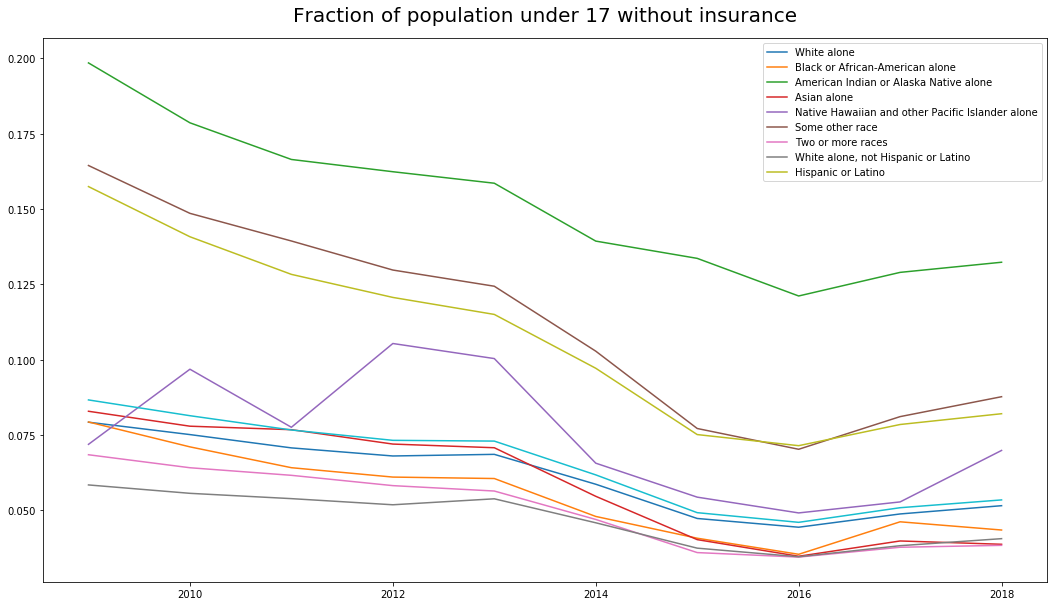

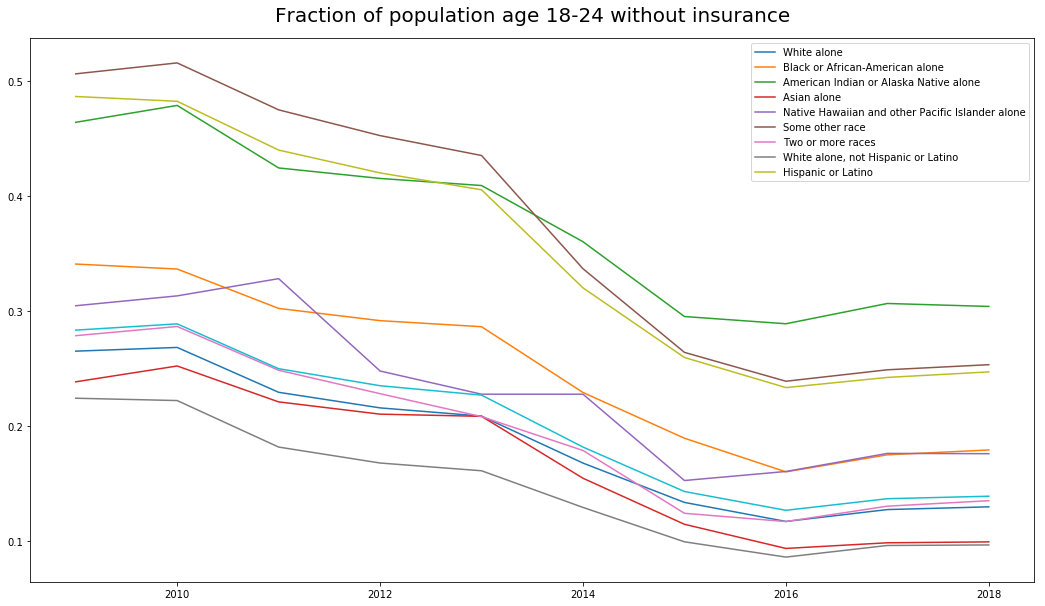

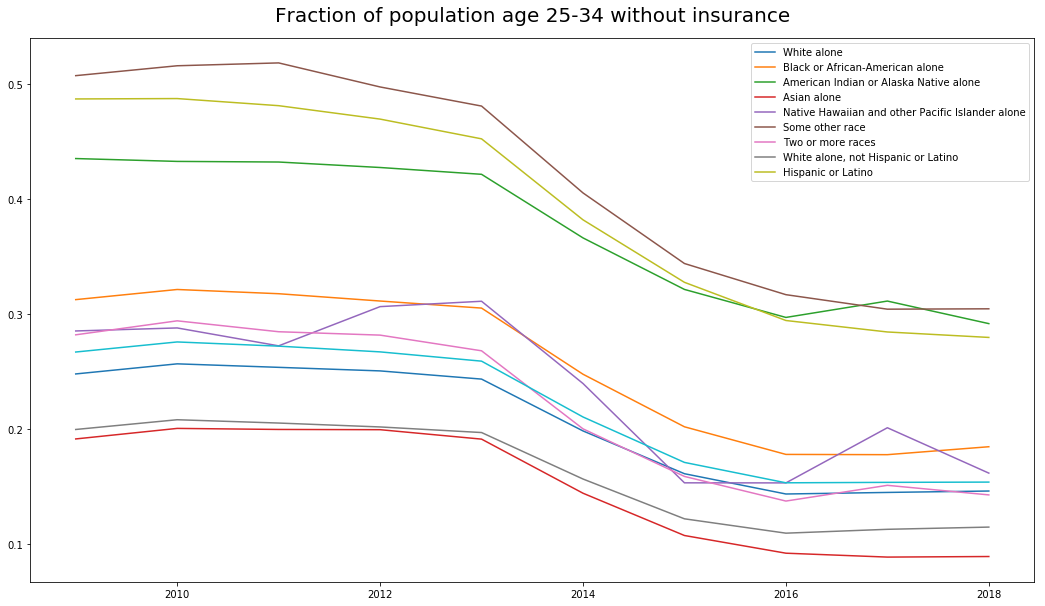

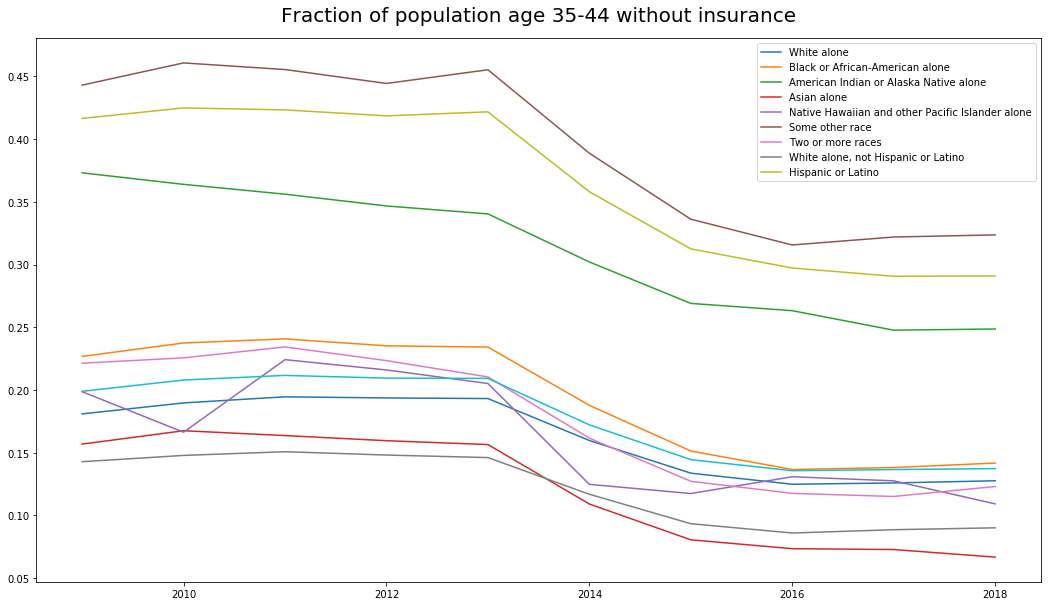

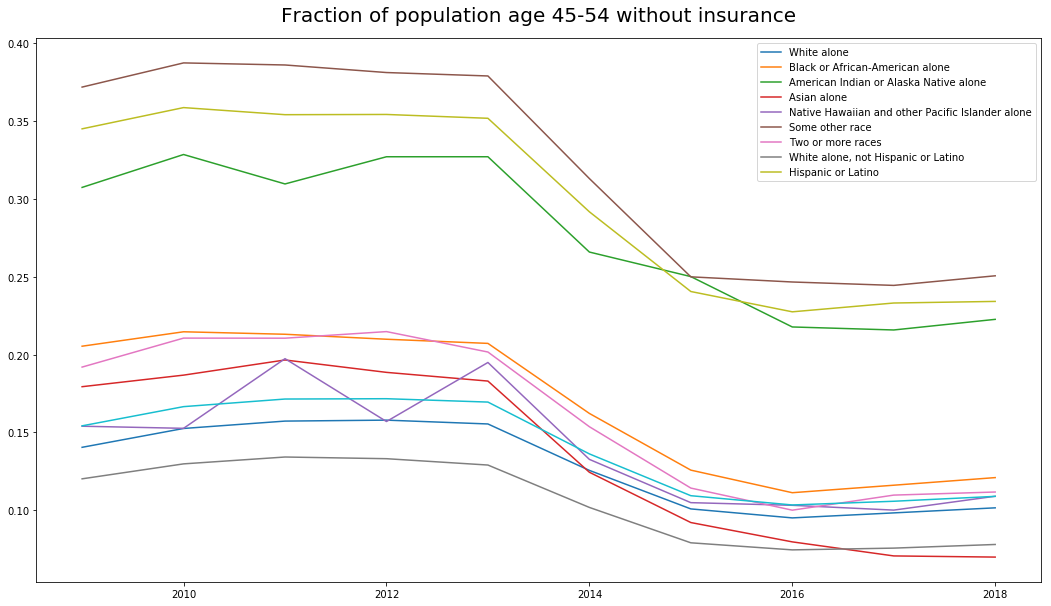

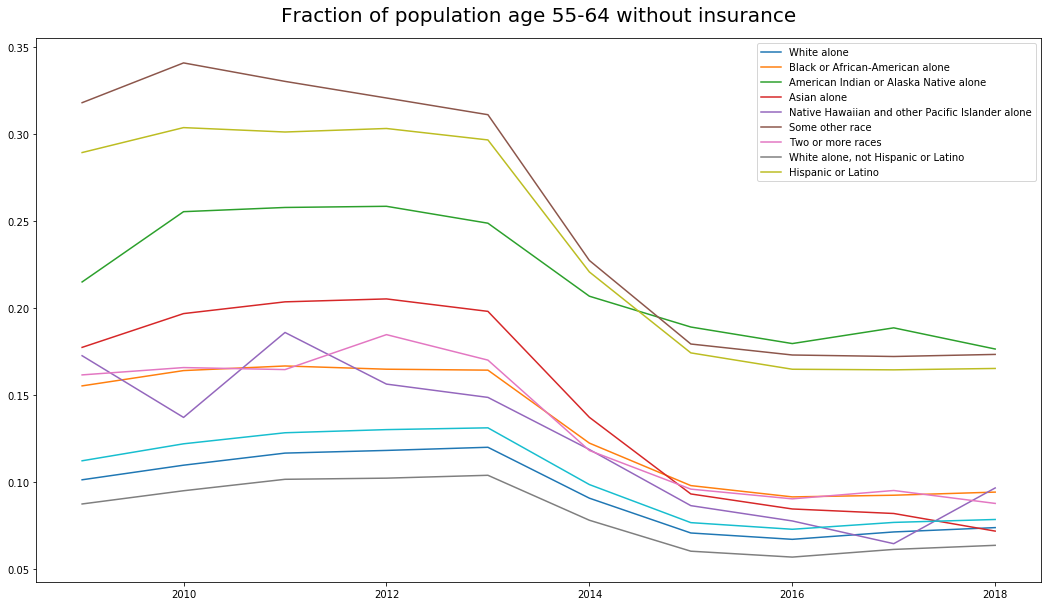

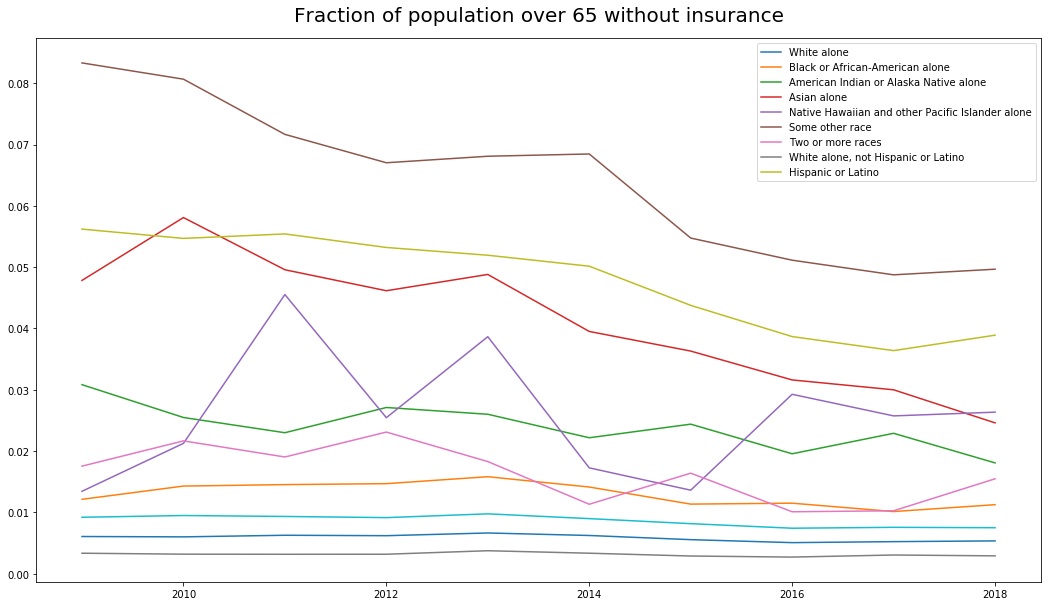

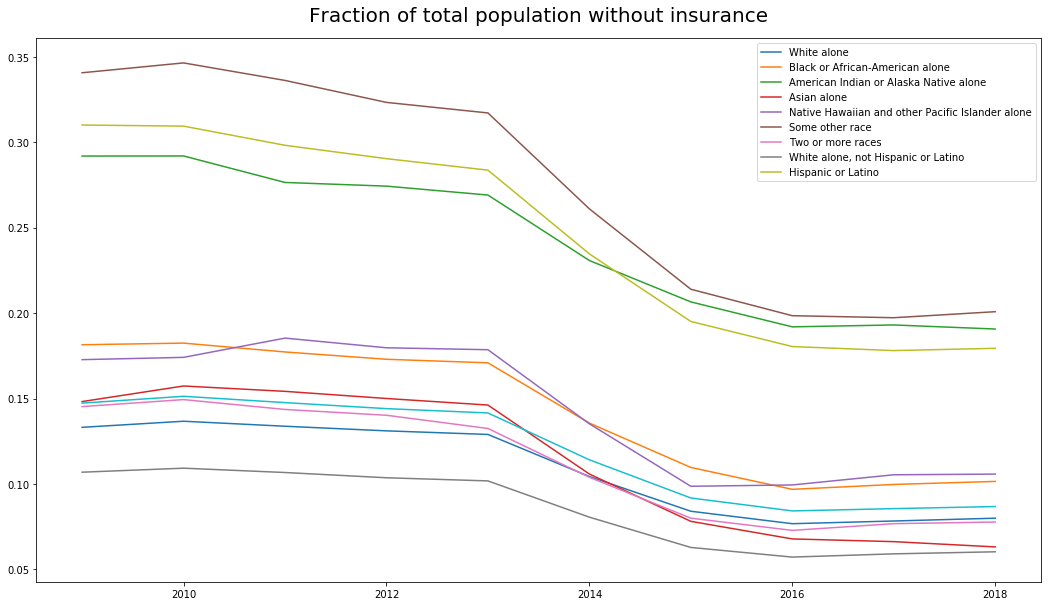

In [14]:
##Can ignore this part. Simply plotting fractions comparisons across race/ethnicity

from numpy import *
import math
import matplotlib.pyplot as plt

import pandas as pd
from matplotlib.pyplot import *



dataFrameByAge=dict()



for item in addedLabels:
    fig, ax = subplots()
    for label in ethnicityLabels:
        frame=data_byrace_cleaned[label]
        f1 = plt.figure(1)
        frame[item].plot(figsize=(18,10), ax=ax)
    
    ax.legend(["White alone", "Black or African-American alone", "American Indian or Alaska Native alone", 
               "Asian alone", 'Native Hawaiian and other Pacific Islander alone','Some other race','Two or more races','White alone, not Hispanic or Latino', 'Hispanic or Latino']);
    ax.set_title(item, fontsize=20) # or size, alternatively
    ttl = ax.title
    ttl.set_position([.5, 1.02])
    
plt.show()

In [15]:
##Ok, now we make one table for each age, but including all ethnicities/races


ageGroups=['All ages', 'Under 17','Age 18-24','Age 25-34','Age 35-44','Age 45-54','Age 55-64','Over 65']
newLabels=['White alone', "Black or African-American alone", "American Indian or Alaska Native alone", 
           "Asian alone", 'Native Hawaiian and other Pacific Islander alone', 'Some other race', 'Two or more races']

#New dictionary; now each key is one age, and each value is a dataframe for that age
dataByAge=dict()



for age in ageGroups:
    agesLabels=[age +': total', age + ': with insurance', age +': without insurance']
    #print(agesLabels)
    dataFrame=pd.DataFrame(index=data_byrace_cleaned['Black or African-American alone'].index)
    for label in ethnicityLabels:
        ageRaceLabels=[label+':' + age +': total', label+':' +age + ': with insurance', label+':' + age +': without insurance']
        for item in agesLabels:
            dataFrame[label+', ' +item]=data_byrace_cleaned[label][item].copy()
        dataByAge[age]=dataFrame

#Uncomment to see what each table looks like
dataByAge['Under 17']
    

,"White alone, Under 17: total","White alone, Under 17: with insurance","White alone, Under 17: without insurance","Black or African-American alone, Under 17: total","Black or African-American alone, Under 17: with insurance","Black or African-American alone, Under 17: without insurance","American Indian or Alaska Native alone, Under 17: total","American Indian or Alaska Native alone, Under 17: with insurance","American Indian or Alaska Native alone, Under 17: without insurance","Asian alone, Under 17: total",...,"Two or more races, Under 17: without insurance","White alone, not Hispanic or Latino, Under 17: total","White alone, not Hispanic or Latino, Under 17: with insurance","White alone, not Hispanic or Latino, Under 17: without insurance","Hispanic or Latino, Under 17: total","Hispanic or Latino, Under 17: with insurance","Hispanic or Latino, Under 17: without insurance","Not Black or African-American, Under 17: total","Not Black or African-American, Under 17: with insurance","Not Black or African-American, Under 17: without insurance"
2009,51402878,47326694,4076184,10535585,9699356,836229,699205,560400,138805,3099880,...,247105,40994672,38597260,2397412,16675907,14049801,2626106,63822768,58289974,5532794
2010,50430088,46638283,3791805,10703730,9942565,761165,735434,604053,131381,3238823,...,254574,39581326,37376740,2204586,17168851,14750920,2417931,63313794,58156571,5157223
2011,50319501,46758096,3561405,10532973,9856747,676226,731513,609731,121782,3248487,...,253044,39126814,37016489,2110325,17380709,15149875,2230834,63241556,58390125,4851431
2012,50101571,46690233,3411338,10495592,9854447,641145,719191,602387,116804,3318809,...,245471,38709895,36700940,2008955,17546899,15428952,2117947,63081912,58459250,4622662
2013,49883786,46460272,3423514,10416803,9785446,631357,697822,587149,110673,3371166,...,245701,38337632,36272016,2065616,17693070,15657283,2035787,63029259,58426284,4602975
2014,49679030,46762272,2916758,10405158,9905439,499719,720538,620101,100437,3424599,...,210451,37997057,36252153,1744904,17883393,16145163,1738230,63035115,59138298,3896817
2015,49621603,47271798,2349805,10353171,9930731,422440,708480,613783,94697,3496416,...,165987,37734399,36319210,1415189,18084795,16724942,1359853,63138760,60027215,3111545
2016,4.90878e+07,4.69059e+07,2.18193e+06,1.02779e+07,9.91339e+06,364526,731898,643206,88692,3.52766e+06,...,165864,3.74383e+07,3.61409e+07,1.29738e+06,1.82896e+07,1.69817e+07,1.30784e+06,6.32259e+07,6.03129e+07,2.91295e+06
2017,52080742,49536467,2544275,10947910,10441594,506316,773489,673699,99790,3825849,...,193023,39546586,38031147,1515439,19549550,18014219,1535331,67127414,63708920,3418494
2018,51875915,49199509,2676406,10892007,10417967,474040,789647,685116,104531,3795530,...,204339,39142596,37551260,1591336,19666632,18051746,1614886,66925103,63343773,3581330


In [16]:
# The previous dataframes contained too many columns. Now we make the excel version, where we sum all races/ethnicities except for Black
# Again, there are definitely better ways to do this :)

excelVersion=dict()

for age in ageGroups:
    ageLabs=['White alone, '+age+': total', 'White alone, '+age+': with insurance', 'White alone, '+age+': without insurance', 
             'American Indian or Alaska Native alone, '+age+': total', 'American Indian or Alaska Native alone, '+age+': with insurance', 'American Indian or Alaska Native alone, '+age+': without insurance', 
             'Asian alone, '+age+': total', 'Asian alone, '+age+': with insurance', 'Asian alone, '+age+': without insurance', 
             'Native Hawaiian and other Pacific Islander alone, '+age+': total', 'Native Hawaiian and other Pacific Islander alone, '+age+': with insurance', 'Native Hawaiian and other Pacific Islander alone, '+age+': without insurance', 
             'Some other race, '+age+': total', 'Some other race, '+age+': with insurance', 'Some other race, '+age+': without insurance', 
             'Two or more races, '+age+': total', 'Two or more races, '+age+': with insurance', 'Two or more races, '+age+': without insurance',
             'White alone, not Hispanic or Latino, '+age+': total', 'White alone, not Hispanic or Latino, '+age+': with insurance', 'White alone, not Hispanic or Latino, '+age+': without insurance']
    dataByAge[age]['All, not Black or African-American, '+age+': total']=dataByAge[age][ageLabs[0]]+dataByAge[age][ageLabs[3]]+dataByAge[age][ageLabs[6]]+dataByAge[age][ageLabs[9]]+dataByAge[age][ageLabs[12]]+dataByAge[age][ageLabs[15]]
    dataByAge[age]['All, not Black or African-American, '+age+': with insurance']=dataByAge[age][ageLabs[1]]+dataByAge[age][ageLabs[4]]+dataByAge[age][ageLabs[7]]+dataByAge[age][ageLabs[10]]+dataByAge[age][ageLabs[13]]+dataByAge[age][ageLabs[16]]
    dataByAge[age]['All, not Black or African-American, '+age+': without insurance']=dataByAge[age][ageLabs[2]]+dataByAge[age][ageLabs[5]]+dataByAge[age][ageLabs[8]]+dataByAge[age][ageLabs[11]]+dataByAge[age][ageLabs[14]]+dataByAge[age][ageLabs[17]]
    excelVersion[age]=dataByAge[age][['Black or African-American alone, '+age+': total', 'Black or African-American alone, '+age+': with insurance', 'Black or African-American alone, '+age+': without insurance',
                                     'All, not Black or African-American, '+age+': total', 'All, not Black or African-American, '+age+': with insurance', 'All, not Black or African-American, '+age+': without insurance',
                                     'White alone, not Hispanic or Latino, '+age+': total', 'White alone, not Hispanic or Latino, '+age+': with insurance', 'White alone, not Hispanic or Latino, '+age+': without insurance']]
    
    

In [17]:
#Now we save each dataframe as a separate excel file. I didn't figure out how to put them automatically in separate sheets, and put them together manually.

for age in ageGroups:
    filename='Health insurance coverage'+age+'.xlsx'
    excelVersion[age].to_excel(filename)  

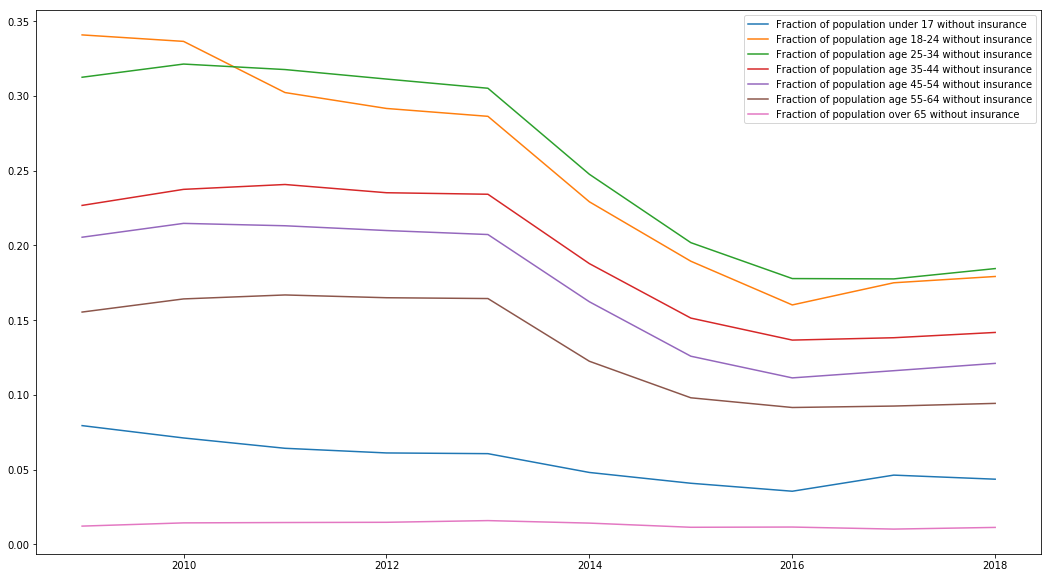

In [18]:
#More plotting: ignore

addedLabels=['Fraction of population under 17 without insurance', 'Fraction of population age 18-24 without insurance', 
             'Fraction of population age 25-34 without insurance', 'Fraction of population age 35-44 without insurance', 
             'Fraction of population age 45-54 without insurance', 'Fraction of population age 55-64 without insurance', 
             'Fraction of population over 65 without insurance']

frame=data_byrace_cleaned['Black or African-American alone']
fig, ax = subplots()
for item in addedLabels:
    frame[item].plot(figsize=(18,10), ax=ax)
    
ax.legend(addedLabels)
plt.show()